In [1]:
#loading the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing the data
MTcars = pd.read_csv("/content/drive/MyDrive/Datasets/mtcars.csv", sep=",")

In [14]:
MTcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [32]:
#examining the top five data points
MTcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [34]:
MTcars['cyl'] = MTcars['cyl'].astype('object')
MTcars['vs'] = MTcars['am'].astype('object')
MTcars['am'] = MTcars['am'].astype('object')
MTcars['gear'] = MTcars['gear'].astype('object')
MTcars['carb'] = MTcars['carb'].astype('object')

In [35]:
MTcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     object 
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     object 
 9   am      32 non-null     object 
 10  gear    32 non-null     object 
 11  carb    32 non-null     object 
dtypes: float64(5), int64(1), object(6)
memory usage: 3.1+ KB


In [36]:
MTcars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900


In [37]:
MTcars.groupby(['cyl'])['mpg'].mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


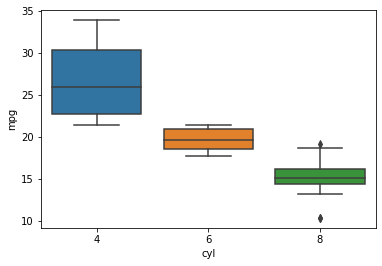

In [27]:
sns.boxplot(MTcars['cyl'], MTcars['mpg'])

In [28]:
model = ols('mpg ~ cyl', data=MTcars).fit()

In [39]:
avoRes = sm.stats.anova_lm(model, typ=2)
avoRes

,sum_sq,df,F,PR(>F)
cyl,824.784590,2.0,39.697515,4.978919e-09
Residual,301.262597,29.0,NaN,NaN


              sum_sq    df          F        PR(>F)
cyl       824.784590   2.0  39.697515  4.978919e-09
Residual  301.262597  29.0        NaN           NaN


In [15]:
pd.crosstab(index=MTcars['am'], columns=MTcars['cyl'],values=MTcars['mpg'], aggfunc=np.mean)

cyl,4,6,8
am,,,
0,22.900,19.125000,15.05
1,28.075,20.566667,15.40


In [42]:
model2 = ols('mpg ~ cyl + am', data=MTcars).fit()

In [43]:
avoRes2 = sm.stats.anova_lm(model2, type=2)
avoRes2

,df,sum_sq,mean_sq,F,PR(>F)
cyl,2.0,824.784590,412.392295,43.656609,2.476881e-09
am,1.0,36.766919,36.766919,3.892214,5.845717e-02
Residual,28.0,264.495678,9.446274,NaN,NaN


In [50]:
#cross table
contingency_table = pd.crosstab(MTcars['am'], MTcars['cyl'])
print("The observed values are: ")
contingency_table.values

The observed values are: 


array([[ 3,  4, 12],
       [ 8,  3,  2]])

In [51]:
from scipy.stats import chi2_contingency

In [54]:
chi2,p,df,exp = chi2_contingency(contingency_table)
print("P-value: ", p)

if p < 0.05:
  print("Reject Ho, There is a significant relationship between two categorical variables")
else:
  print("Accept Ho, There is no relationship between two categorical variables")

P-value:  0.012646605046107276
Reject Ho, There is a significant relationship between two categorical variables


In [58]:
model_1 = ols('mpg ~ gear', data=MTcars).fit()

avoRes_1 = sm.stats.anova_lm(model, typ=2)
avoRes_1

,sum_sq,df,F,PR(>F)
cyl,824.784590,2.0,39.697515,4.978919e-09
Residual,301.262597,29.0,NaN,NaN


In [59]:
model2 = ols('mpg ~ gear + vs', data=MTcars).fit()

avoRes2 = sm.stats.anova_lm(model2, type=2)
avoRes2

,df,sum_sq,mean_sq,F,PR(>F)
gear,2.0,483.243188,241.621594,11.869082,0.000185
vs,1.0,72.801667,72.801667,3.576208,0.069001
Residual,28.0,570.002333,20.357226,NaN,NaN


In [60]:
#cross table
contingency_tab = pd.crosstab(MTcars['gear'], MTcars['vs'])
print("The observed values are: ")
contingency_tab.values

The observed values are: 


array([[15,  0],
       [ 4,  8],
       [ 0,  5]])

In [63]:
chi,p,df,expe = chi2_contingency(contingency_tab)
print("P-value: ", p)

P-value:  2.8308889589756233e-05
